# Dependências

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, GRU
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt

# Configurações

In [2]:
SEQUENCE_LENGTH = 200
TOTAL_SAMPLES = 2000
HIDDEN_UNIT_SIZE = 128
EPOCHS = 20
LEARNING_RATE = 0.1

# Utils

In [3]:
def create_pure_long_dependency_dataset(seq_len, num_samples, noise_level=0.1):
    """
    Cria um dataset de previsão de séries temporais baseado em uma reta aleatória (a*x + b).
    O alvo (y) é o próximo ponto da série (X[T]).
    """
    X = np.zeros((num_samples, seq_len, 1)).astype(np.float32)
    y = np.zeros((num_samples, 1)).astype(np.float32)

    # Vetor de tempo (t = 0, 1, 2, ..., seq_len - 1)
    time_steps = np.arange(seq_len).reshape(-1, 1)

    for i in range(num_samples):
        # Coeficientes aleatórios:
        # a (declive/slope): entre -1.0 e 1.0
        # b (intercepto/bias): entre -2.0 e 2.0
        a = np.random.uniform(-1.0, 1.0)
        b = np.random.uniform(-2.0, 2.0)

        # Gerar a série (X) e o próximo ponto (y)
        trend = a * time_steps + b

        # Adicionar ruído:
        noise = np.random.uniform(-noise_level, noise_level, (seq_len, 1))

        # Sequência de entrada X
        X[i, :, :] = trend + noise

        # Alvo y: O próximo ponto da série, sem ruído para um target mais limpo
        y[i, 0] = a * seq_len + b

    # Normalização: Importante para Regressão RNN
    # Normalizamos X e y para o intervalo [0, 1] ou [-1, 1]
    # Usaremos uma normalização simples baseada em estimativas do range
    max_val = np.max(np.abs(X)) * 1.5 # buffer
    X /= max_val
    y /= max_val

    return X, y

# Dataset

In [4]:
X_train, y_train = create_pure_long_dependency_dataset(SEQUENCE_LENGTH, TOTAL_SAMPLES)
X_val, y_val = create_pure_long_dependency_dataset(SEQUENCE_LENGTH, TOTAL_SAMPLES // 5)

print(f"Shape de Treinamento X: {X_train.shape}")
print(f"Shape de Treinamento y: {y_train.shape}")

Shape de Treinamento X: (2000, 200, 1)
Shape de Treinamento y: (2000, 1)


# Arquitetura

In [5]:
# Modelo SimpleRNN ---
rnn_model = Sequential([
    SimpleRNN(HIDDEN_UNIT_SIZE, input_shape=(SEQUENCE_LENGTH, 1)),
    Dense(1, activation='sigmoid')
])
rnn_model.compile(optimizer=SGD(learning_rate=LEARNING_RATE),
                  loss='mse')

print("\nModelo SimpleRNN Sumário:")
rnn_model.summary()

# Modelo LSTM ---
lstm_model = Sequential([
    LSTM(HIDDEN_UNIT_SIZE, input_shape=(SEQUENCE_LENGTH, 1)),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer=SGD(learning_rate=LEARNING_RATE),
                   loss='mse')

print("\nModelo LSTM Sumário:")
lstm_model.summary()

# Modelo GRU ---
gru_model = Sequential([
    GRU(HIDDEN_UNIT_SIZE, input_shape=(SEQUENCE_LENGTH, 1)),
    Dense(1, activation='sigmoid')
])

gru_model.compile(optimizer=SGD(learning_rate=LEARNING_RATE),
                  loss='mse')

print("\nModelo GRU Sumário:")
gru_model.summary()



Modelo SimpleRNN Sumário:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,769 (65.50 KB)

 Non-trainable params: 0 (0.00 B)


Modelo LSTM Sumário:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)


Modelo GRU Sumário:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,433 (197.00 KB)

 Trainable params: 50,433 (197.00 KB)

 Non-trainable params: 0 (0.00 B)

# Treinamento

In [6]:
# Treinamento ---

print("\n--- Treinando SimpleRNN ---")
rnn_history = rnn_model.fit(X_train, y_train, epochs=EPOCHS,
                            validation_data=(X_val, y_val))

# print("\n--- Treinando LSTM ---")
# lstm_history = lstm_model.fit(X_train, y_train, epochs=EPOCHS,
#                               validation_data=(X_val, y_val))

print("\n--- Treinando GRU ---")
gru_history = gru_model.fit(X_train, y_train, epochs=EPOCHS,
                              validation_data=(X_val, y_val))



--- Treinando SimpleRNN ---
Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.1888 - val_loss: 0.6690
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.2118 - val_loss: 0.1514
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.1531 - val_loss: 0.1505
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.1529 - val_loss: 0.1503
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.1493 - val_loss: 0.1502
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.1515 - val_loss: 0.1501
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.1497 - val_loss: 0.1501
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.1445 - val_loss: 0.1501
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.1477 - val_loss: 0.1501
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.1459 - val_loss: 0.1501
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.1474 - val_loss: 0.1501
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━

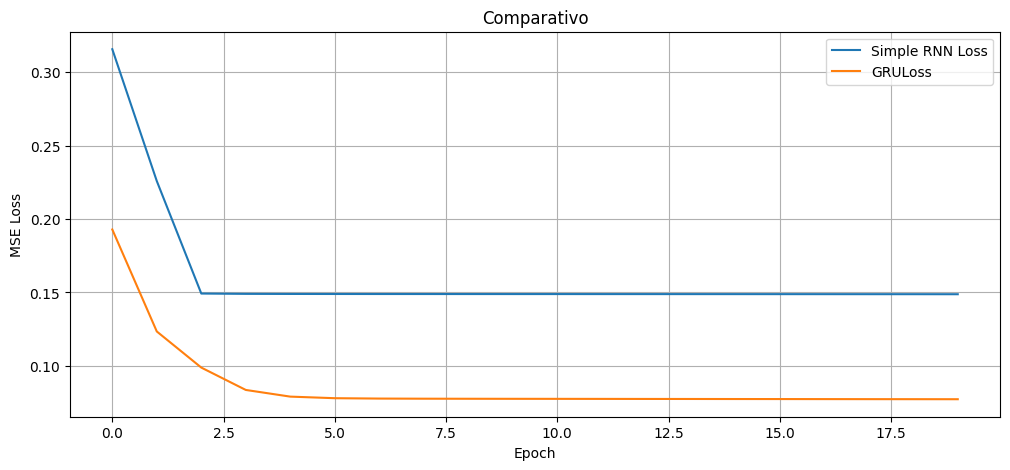

In [7]:
# Plotting para visualização
plt.figure(figsize=(12, 5))

# Plot Loss
plt.plot(rnn_history.history['loss'], label='Simple RNN Loss')
plt.plot(gru_history.history['loss'], label='GRULoss')
plt.title('Comparativo')

plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


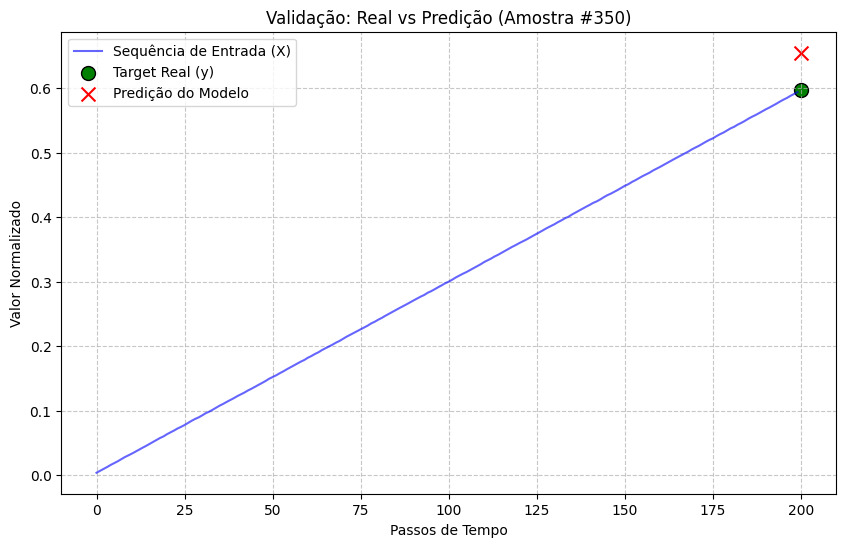

Valor Real: 0.5968
Predição:   0.6551
Erro Absoluto: 0.0583


In [35]:
# 1. Selecionar um exemplo aleatório do set de validação
idx = np.random.randint(0, len(X_val))
sample_input = X_val[idx : idx + 1]  # Mantém o shape (1, 200, 1)
target_real = y_val[idx]

# 2. Fazer a predição
prediction = gru_model.predict(sample_input)

# 3. Visualização
plt.figure(figsize=(10, 6))

# Plotar a sequência de entrada (os 200 pontos que a rede viu)
plt.plot(np.arange(SEQUENCE_LENGTH), sample_input[0], label='Sequência de Entrada (X)', color='blue', alpha=0.6)

# Plotar o Target Real (o ponto 201 que deveria ser)
plt.scatter(SEQUENCE_LENGTH, target_real, color='green', label='Target Real (y)', s=100, edgecolors='black')

# Plotar a Predição do Modelo
plt.scatter(SEQUENCE_LENGTH, prediction, color='red', marker='x', label='Predição do Modelo', s=100)

plt.title(f'Validação: Real vs Predição (Amostra #{idx})')
plt.xlabel('Passos de Tempo')
plt.ylabel('Valor Normalizado')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

print(f"Valor Real: {target_real[0]:.4f}")
print(f"Predição:   {prediction[0][0]:.4f}")
print(f"Erro Absoluto: {abs(target_real[0] - prediction[0][0]):.4f}")